In [ ]:
!pip install keras

#Load Saved X & Y

In [4]:
import pandas as pd
X_train = pd.read_csv("data_x_train.csv")
X_test = pd.read_csv("data_x_test.csv")
Y_train = pd.read_csv("data_y_train.csv")
Y_test = pd.read_csv("data_y_test.csv")
X_train.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
262,1238,74,25,110,154,97,1052,39,399,118,113,154,5,952,150,1763,374,154,301,118,154,52,952,346,260,60,142,3620,572,568,6,113,199,152,3621,28,277,1202,30,3622,20,154,346,767,61,263,62,179,52,1989
2940,136,12,21,81,7,9,46,3,123,163,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6434,118,642,106,195,185,60,17,28,5,205,509,15,28,15,29,374,60,177,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1526,115,19,125,5,74,22,29,119,74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3340,2,51,1,533,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1246,115,27,6,78,115,121,74,71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5065,1,104,34,22,172,698,556,460,32,42,34,218,35,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2980,30,66,5,89,13,37,148,25,60,418,100,6,606,138,30,435,265,187,28,293,27,6,42,95,16,938,24,3,37,53,67,186,6,14,111,29,16,160,23,436,1823,11,1724,414,70,225,76,0,0,0
623,2,12,21,4,10,9,8,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3885,2,36,125,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
print('Shape of data tensor of train: ', X_train.shape)
print('Shape of data tensor of test: ', X_test.shape)
print('Shape of label tensor of train: ', Y_train.shape)
print('Shape of label tensor of test: ', Y_test.shape)

Shape of data tensor of train:  (6897, 50)
Shape of data tensor of test:  (767, 50)
Shape of label tensor of train:  (6897, 2)
Shape of label tensor of test:  (767, 2)


In [6]:
VOCABULARY_SIZE = X_train.to_numpy().max() + 1

print("Vocalbulary size: ", VOCABULARY_SIZE)

Vocalbulary size:  4621


#Build Model

In [7]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, Dropout, SpatialDropout1D, LSTM, Dense, Conv1D, MaxPooling1D, GRU, Flatten
from keras.regularizers import l2

EMBEDDING_DIMENSION = 64

model = Sequential()
model.add(Embedding(VOCABULARY_SIZE, EMBEDDING_DIMENSION, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(EMBEDDING_DIMENSION, dropout=0.2)))
model.add(Dense(Y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 64)            295744    
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 64)           0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 362,050
Trainable params: 362,050
Non-trainable params: 0
_________________________________________________________________


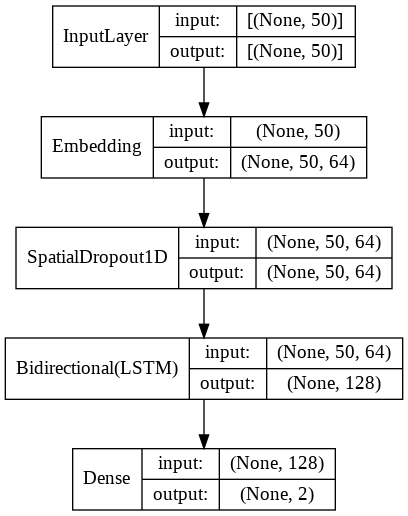

In [8]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

#Perform Model
Iterasi: 30\
Ukuran tiap iterasi: 256\
Iterasi akan berhenti ketika akurasi validasi tidak meningkat setelah 5 kali

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

filepath="./best_val_accuracy.hdf5"
stopping = EarlyStopping(monitor='val_accuracy', patience=5)
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [stopping]

epochs = 30
batch_size = 256

history = model.fit(
  X_train,
  Y_train,
  epochs=epochs,
  batch_size=batch_size,
  validation_data=(X_test, Y_test),
  callbacks=[callbacks_list],
  verbose=1
)

Epoch 1/30
27/27 [==============================] - 10s 81ms/step - loss: 0.6426 - accuracy: 0.6426 - val_loss: 0.5331 - val_accuracy: 0.7053
Epoch 2/30
27/27 [==============================] - 1s 35ms/step - loss: 0.4200 - accuracy: 0.8128 - val_loss: 0.2895 - val_accuracy: 0.9048
Epoch 3/30
27/27 [==============================] - 1s 35ms/step - loss: 0.2996 - accuracy: 0.8881 - val_loss: 0.2608 - val_accuracy: 0.9074
Epoch 4/30
27/27 [==============================] - 1s 34ms/step - loss: 0.2585 - accuracy: 0.9079 - val_loss: 0.2337 - val_accuracy: 0.9192
Epoch 5/30
27/27 [==============================] - 1s 35ms/step - loss: 0.2289 - accuracy: 0.9192 - val_loss: 0.2309 - val_accuracy: 0.9179
Epoch 6/30
27/27 [==============================] - 1s 34ms/step - loss: 0.2109 - accuracy: 0.9279 - val_loss: 0.2296 - val_accuracy: 0.9179
Epoch 7/30
27/27 [==============================] - 1s 33ms/step - loss: 0.1932 - accuracy: 0.9337 - val_loss: 0.2352 - val_accuracy: 0.9140
Epoch 8/30
2

#Visualize accuracy of model

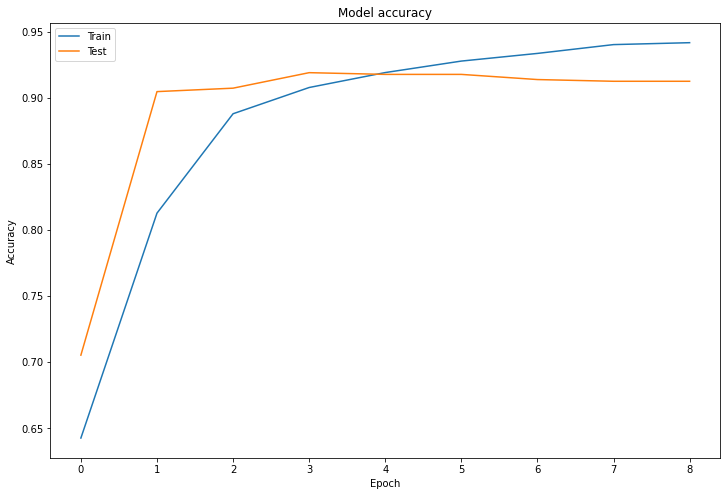

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Dari visualisasi terlihat bahwa model sudah "fit" karena hasil test dan train saling mendekati dengan akurasi >90%

#Confusion Matrix of Model

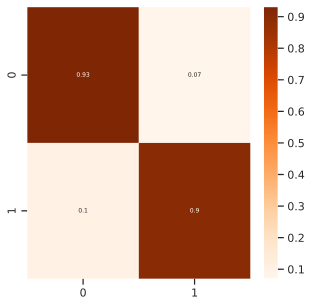

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

Y_pred = model.predict(X_test)

Y_test_non_category = [ np.argmax(t) for t in Y_test.values]
Y_predict_non_category = [ np.argmax(t) for t in Y_pred ]

conf_mat = confusion_matrix(Y_test_non_category, Y_predict_non_category)
sum = conf_mat.sum(axis=1)
conf_mat = [[round(v / sum[i], 2) for v in a] for i, a in enumerate(conf_mat)]

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
sn.set(rc={"figure.dpi":100, 'savefig.dpi':100})
sn.set_context('notebook')
sn.set_style("ticks")

indexs = sorted([0, 1])

columns = [i for i in indexs[0:len(np.unique(Y_test_non_category))]]

df_cm = pd.DataFrame(conf_mat, index=columns, columns=columns)

plt.figure(figsize=(5, 5))
ax = sn.heatmap(df_cm, cmap='Oranges', annot=True, annot_kws={"fontsize":6})

plt.show()

In [ ]:
from sklearn.metrics import classification_report
Y_pred = model.predict(X_test)
Y_test_non_category = [ np.argmax(t) for t in Y_test.values]
Y_predict_non_category = [ np.argmax(t) for t in Y_pred ]

print(classification_report(Y_test_non_category,Y_predict_non_category))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       385
           1       0.93      0.90      0.91       382

    accuracy                           0.91       767
   macro avg       0.91      0.91      0.91       767
weighted avg       0.91      0.91      0.91       767



Hasil menunjukkan nilai f1-score pada akurasi mencapai 0.91, sehingga dapat disimpulkan bahwa model yang dibuat memiliki presisi dan recall yang sangat baik.

#Final Accuracy

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, Y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

24/24 [==============================] - 0s 11ms/step - loss: 0.2513 - accuracy: 0.9126
Accuracy: 91.26%


#Write Model

In [ ]:
model.save("/content/model.h5")